# 6.5 Machine Learning Part 2

This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

## 01 Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\Chris Arnold\Documents\Citibike Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_cleaned_3.csv'))

In [5]:
df.shape

(50000, 13)

In [16]:
df.head()

,Unnamed: 0,bike_id,weekday_index,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,age
0,0,16013,1,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968,45
1,1,15230,4,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983,30
2,2,17942,3,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989,24
3,3,19683,6,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988,25
4,4,18024,6,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,0,0


## 2. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-10609610159555.42,
 -2797111529685.569,
 -1350369992882.2864,
 -843996178852.8413,
 -609688742709.9138,
 -482348069482.1163,
 -405537585505.4662,
 -355724018248.59674,
 -321574277697.9378]

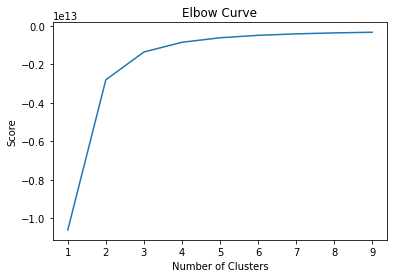

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

This looks like 3 clusters

## 3. k-means clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, random_state=0) 


In [31]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [32]:
#adding cluster column
df['clusters'] = kmeans.fit_predict(df)

In [33]:
#checking work
df.head()

,Unnamed: 0,bike_id,weekday_index,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,age,clusters
0,0,16013,1,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968,45,0
1,1,15230,4,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983,30,0
2,2,17942,3,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989,24,0
3,3,19683,6,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988,25,0
4,4,18024,6,18,521,40.750450,-73.994811,476,40.743943,-73.979661,2296,0,0,0


In [34]:
df['clusters'].value_counts()

0    16720
2    16667
1    16613
Name: clusters, dtype: int64

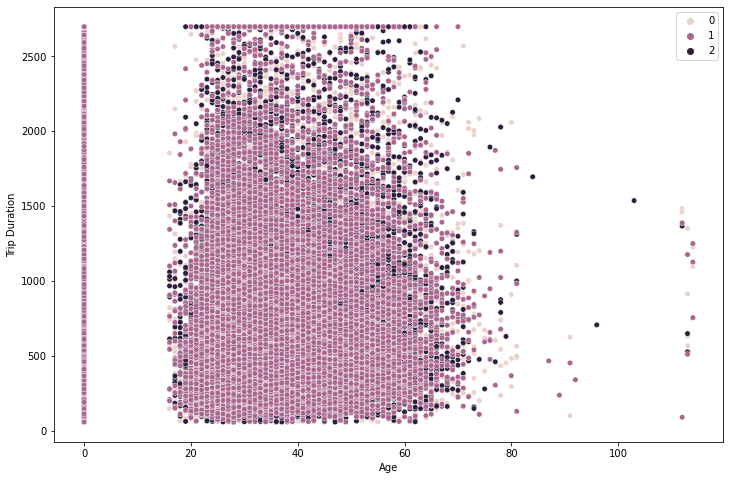

In [50]:
# Plot the clusters for the "age" and "trip_duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['trip_duration'], hue=kmeans.labels_, s=30) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Trip Duration') # Label y-axis.
plt.show()

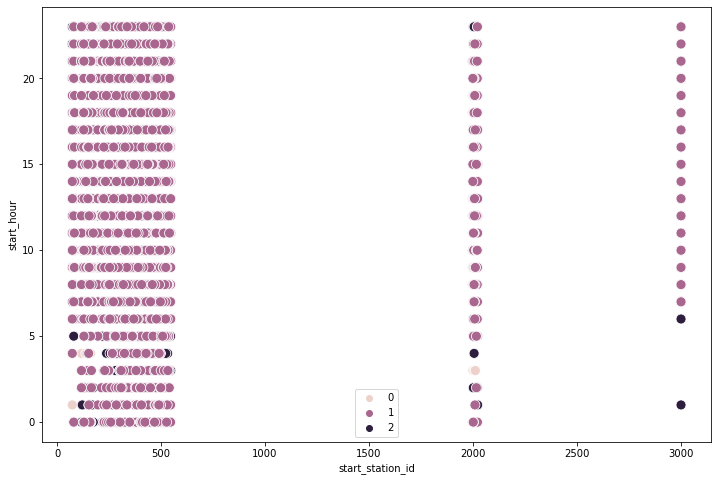

In [36]:
# Plot the clusters for the "start_station_id" and "start_hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_station_id'], y=df['start_hour'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('start_station_id') 
plt.ylabel('start_hour') 
plt.show()

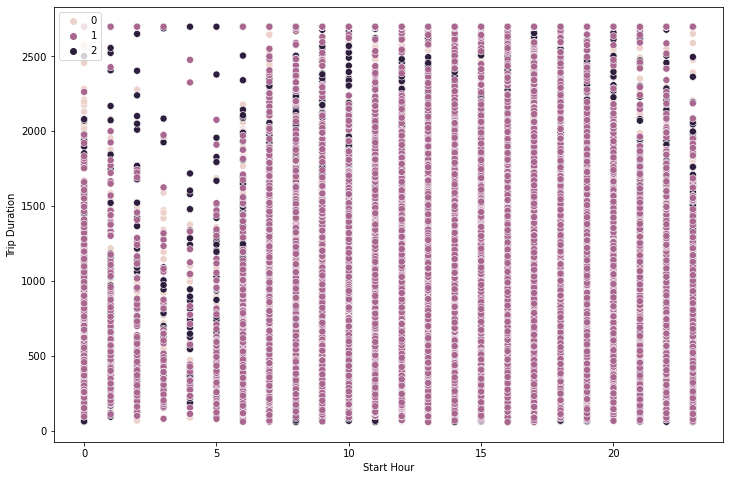

In [46]:
# Plot the clusters for the "start_hour" and "trip_duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=50)

ax.grid(False) 
plt.xlabel('Start Hour') 
plt.ylabel('Trip Duration') 
plt.show()

The groupings in all of these when crossed with all of the variables do not show distinct groups. The issue as stated in the text is that the grain of the two variables that you can cross with each other is not similar. Even with the Age vs trip duration. The groupings overlap so much that you can't get a good view of how they are separated. I can see how this would be a great thing to apply to the right data set, however this type of machine learning does not help me with my analysis.

In [51]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [52]:
df.groupby('cluster').agg({'age':['mean', 'median'], 
                         'start_hour':['mean', 'median'], 
                         'trip_duration':['mean', 'median'],
                          'start_station_id':['mean', 'median']})

age        start_hour        trip_duration         \
                  mean median       mean median          mean median   
cluster                                                                
dark purple  32.132717   33.0  14.126297   15.0    835.816344  670.0   
pink         32.242644   33.0  14.171292   15.0    842.025658  674.0   
purple       32.091555   33.0  14.138024   15.0    839.097394  673.0   

            start_station_id         
                        mean median  
cluster                              
dark purple       445.853603  402.0  
pink              443.403888  402.0  
purple            440.698248  404.0

Considering that the means and Medians are not very far off from each other with each of these variables, the distinctions that were created in the sets are not enough to warrant use in the analysis for Citibike. While the visuals look pretty, they will not help with supporting any hypothesis that I have made. 
The visuals submitted in tableau are going to me much more useful for answering my questions.
This was a good process to go through though as I can see it being very useful in different sitations outside of the Citibike analysis.